#### Goal
The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore


In [93]:
df = pd.read_csv("bank-full.csv")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [95]:
df.shape

(45211, 17)

In [96]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [97]:
### A Baised dataset.

In [98]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [99]:
## Right tailed Skewd dat columns as there is huge difference in mean and 50% of columns balance, duration, pdays,previous ( coz of outlier)

In [100]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


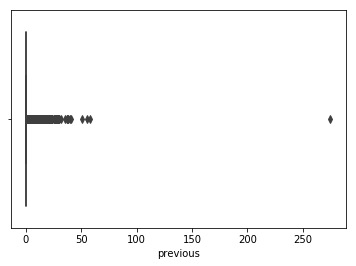

In [101]:
sns.boxplot(df['previous'])

In [102]:
df = df[df.loc[:,'previous'] < 275]

In [103]:
df[df['pdays']<0]['pdays'].count()

36954

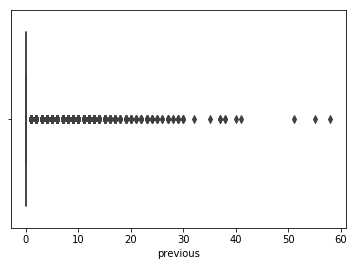

In [104]:
sns.boxplot(df['previous'])

In [105]:
for index, row in df.iterrows():
    if (row['pdays'] < 0):
        df.at[index, 'pdays'] = 0   
    else: 
        pass

In [106]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [107]:
df[df['previous'] == 0][['duration','pdays']].head(5)

,duration,pdays
0,261,0
1,151,0
2,76,0
3,92,0
4,198,0


#### It is evident that, when previously contact =0, days elapsed since contact =0, then duration cannot be a number > 0. Hence we can make this duration =0, for all rows where pdays = previous = 0

In [108]:
###  Data Visualisation

In [109]:
df['Age_bins']=pd.cut(df["age"], bins=[0,20,40,60,100], labels=['young','adult','mid','old']).astype("object")
df.drop(['age'],axis=1,inplace = True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
job          45210 non-null object
marital      45210 non-null object
education    45210 non-null object
default      45210 non-null object
balance      45210 non-null int64
housing      45210 non-null object
loan         45210 non-null object
contact      45210 non-null object
day          45210 non-null int64
month        45210 non-null object
duration     45210 non-null int64
campaign     45210 non-null int64
pdays        45210 non-null int64
previous     45210 non-null int64
poutcome     45210 non-null object
Target       45210 non-null object
Age_bins     45210 non-null object
dtypes: int64(6), object(11)
memory usage: 7.5+ MB


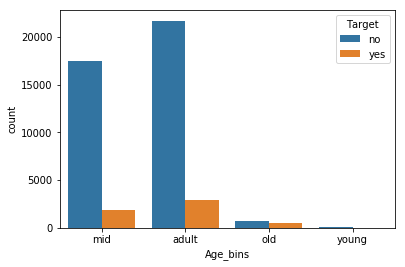

In [111]:
sns.countplot('Age_bins',hue='Target',data = df)

In [112]:
# more people in the age group 20 - 60 have participated in term deposits

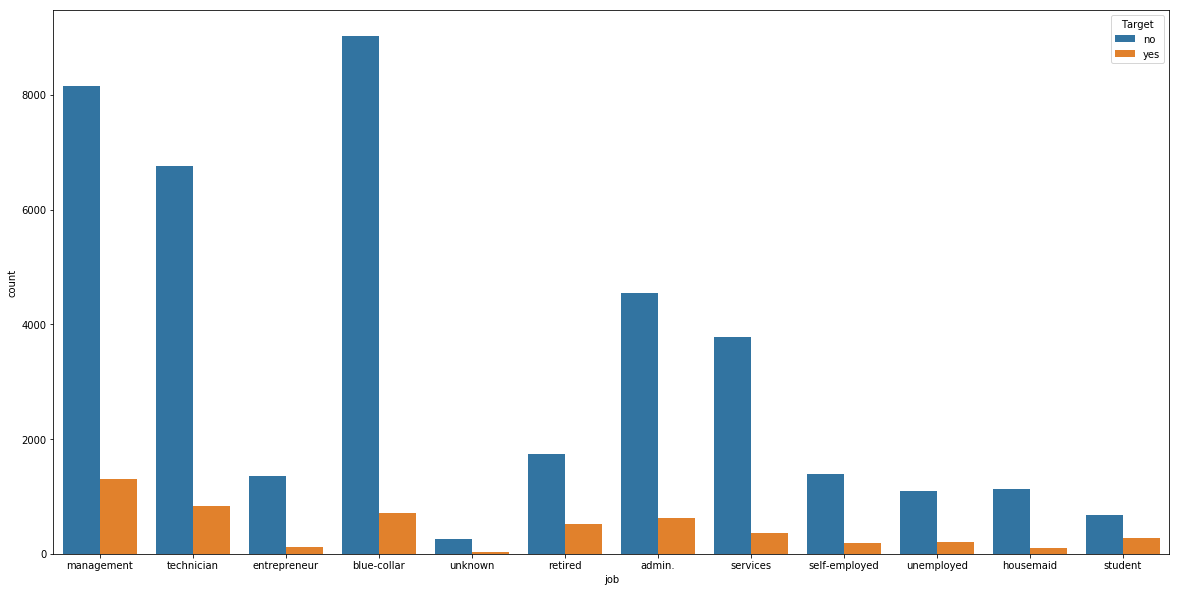

In [113]:
plt.figure(figsize=(20,10))
sns.countplot(x="job",hue= 'Target', data = df)
plt.show()

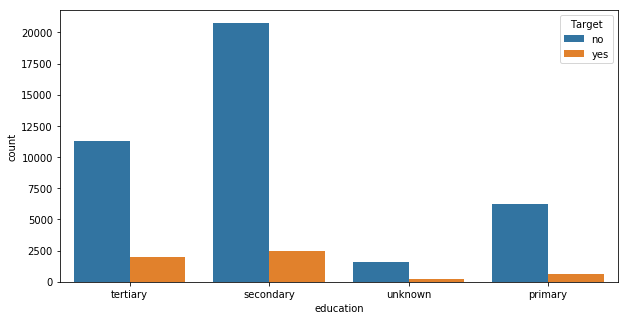

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x="education",hue= 'Target', data = df)
plt.show()

Target
no     [[AxesSubplot(0.125,0.551739;0.103333x0.328261...
yes    [[AxesSubplot(0.125,0.551739;0.103333x0.328261...
dtype: object

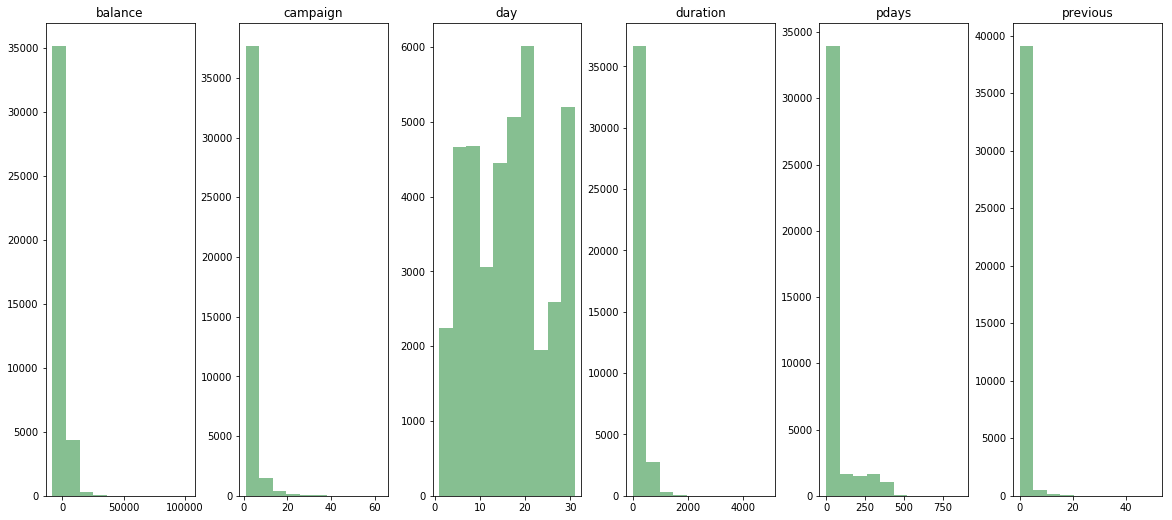

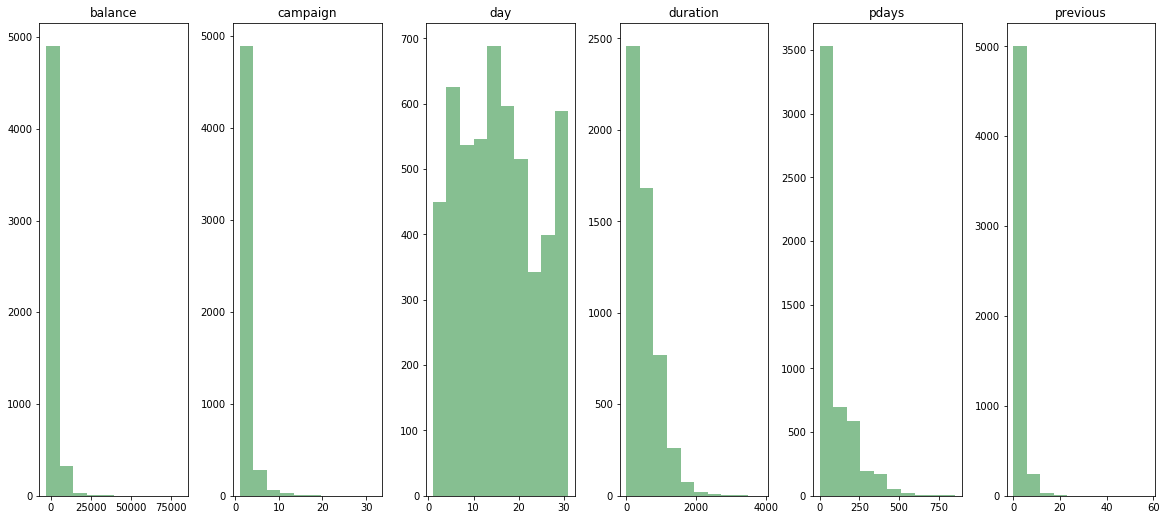

In [115]:
 df.groupby('Target').hist(grid=False, figsize=(20,20), layout=(2,6), color='#86bf91')

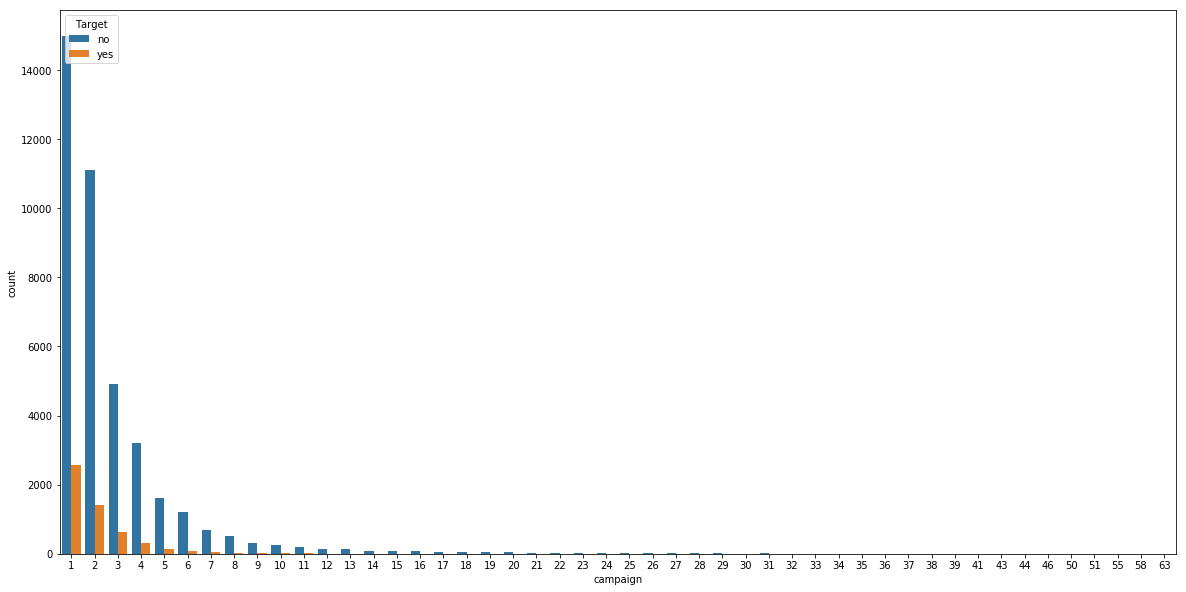

In [116]:
plt.figure(figsize=(20,10))
sns.countplot(x="campaign",hue= 'Target', data = df)
plt.show()

In [117]:
# from the above, Columns day, duration, pday shows that these could be the potential variables 

### insights

In [118]:
##### Age group of 20 - 60 are the major customers who are likely to invest in term deposits
##### Education and job are not a major influencing columns
##### Day when clubbed with the month could have been a good indicator as well
##### Duration shows a variation in graph for two classes. Indicates, if a person had a conversation for a longer duration, 
##### implies he/ she needs more info, and are interested.
##### Campaign tells us that if a customer has to make a term deposit, he would do so, with in 5 campaigns. From the graph it is also understood that this column has long right tail.
##### pday - customers who were communicated previously, has a count for pdays. both are related variables and hence as pday shows variation for people who accepted term deposits, it also is a good independent variable.
##### To keep up the length and breadth of the dataset, we will use all the columns in our analysis.

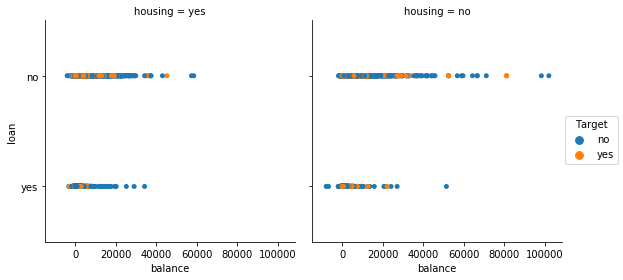

In [119]:
sns.factorplot(x="balance",y="loan",hue="Target",col="housing",data=df,kind="strip")

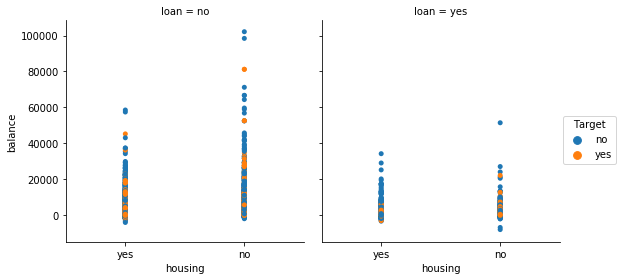

In [120]:
sns.factorplot(x="housing",y="balance",hue="Target",col="loan",data=df,kind = "strip")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E31C8B8C18>,
      dtype=object)

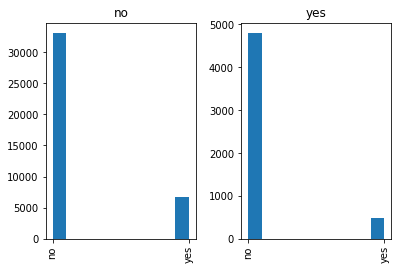

In [121]:
df.hist(by="Target",column="loan")

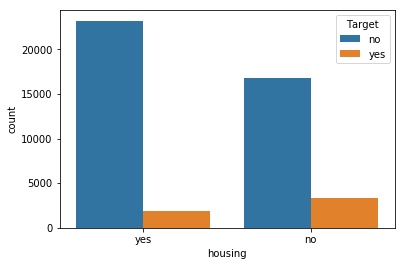

In [122]:
sns.countplot(df['housing'],hue=df['Target'])

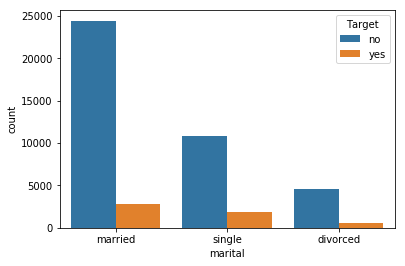

In [123]:
sns.countplot(df["marital"],hue=df["Target"])

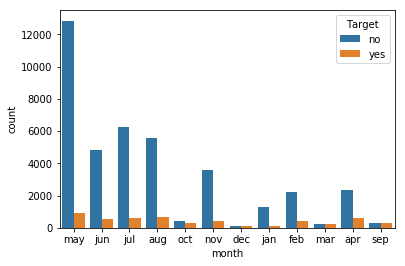

In [124]:
sns.countplot(df['month'],hue=df['Target'])

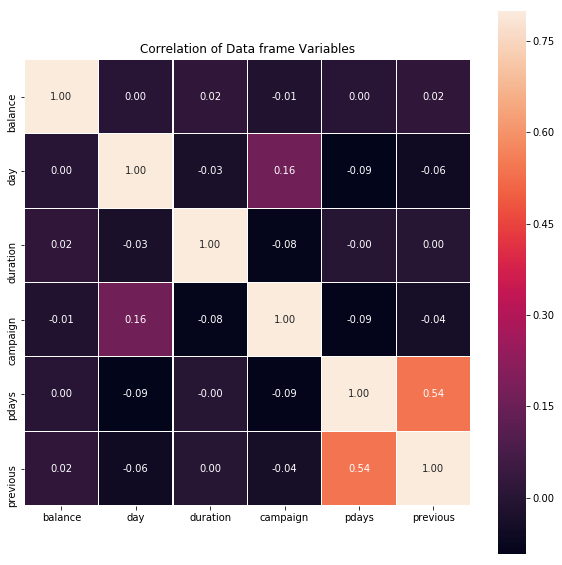

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.8, annot = True, square=True, fmt='.2f', linecolor='white', linewidths=0.01)
plt.title('Correlation of Data frame Variables')
plt.show()

In [126]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1839
success     1511
Name: poutcome, dtype: int64

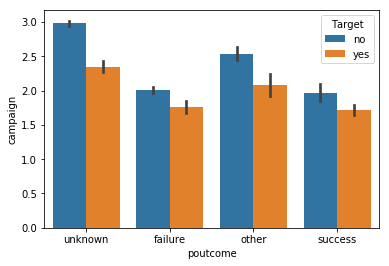

In [127]:
sns.barplot(df['poutcome'],df['campaign'],hue=df['Target'])

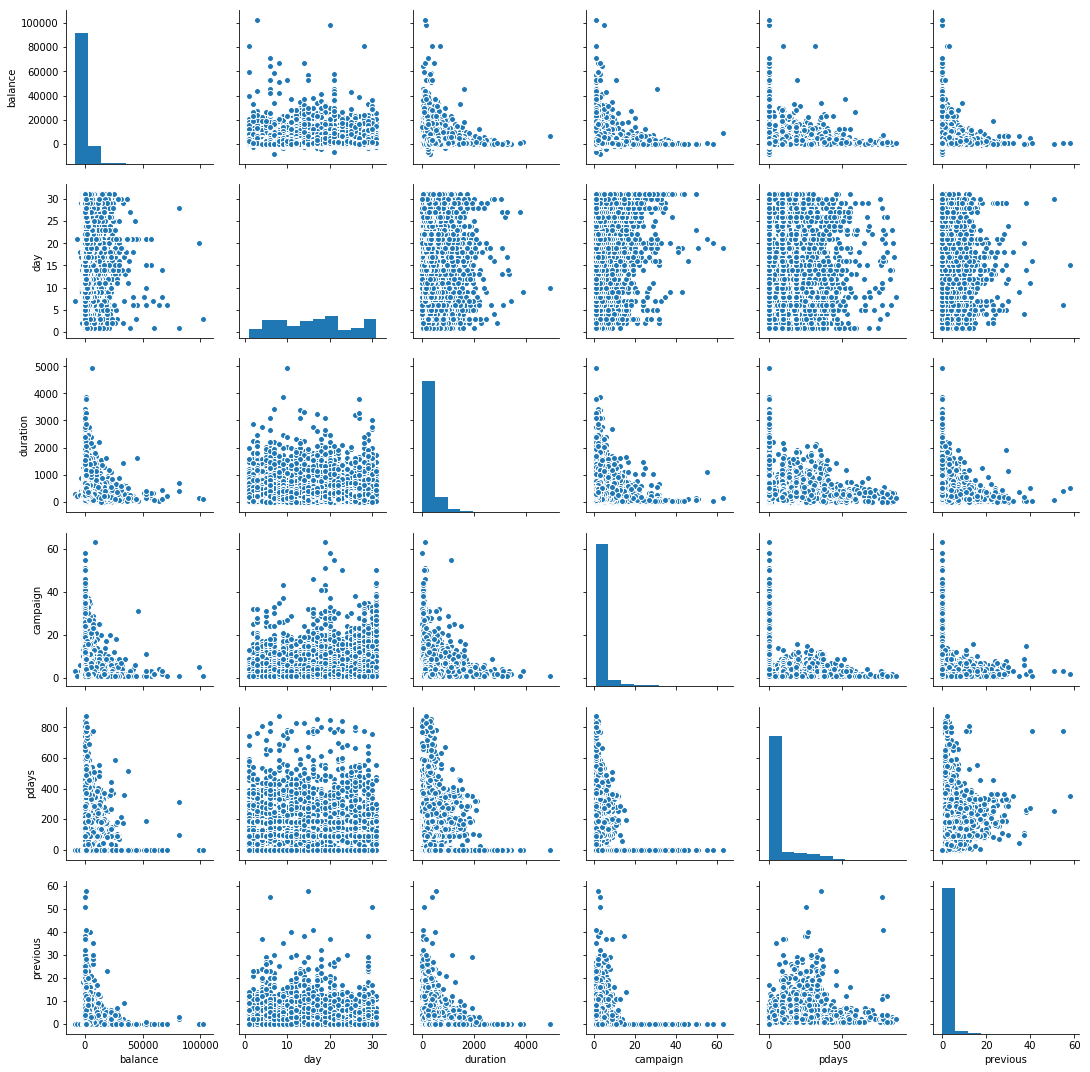

In [128]:
sns.pairplot(df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E30FC8DBA8>,
      dtype=object)

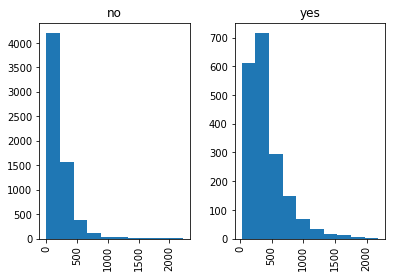

In [129]:
duration_filtered = df[df['previous']>0]['duration']
duration_filtered.hist(by=df['Target'])

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Object= df.select_dtypes('object')
for i in list(df_Object.columns):
    df_Object[i] = le.fit_transform(df_Object[i])

C:\Users\Swetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [131]:
df_Object.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,Target,Age_bins
0,4,1,2,0,1,0,2,8,3,0,1
1,9,2,1,0,1,0,2,8,3,0,1
2,2,1,1,0,1,1,2,8,3,0,0
3,1,1,3,0,1,0,2,8,3,0,1
4,11,2,3,0,0,0,2,8,3,0,0


In [132]:
df_numerical = df.select_dtypes('int64','float64')
new_DF = pd.concat([df_numerical,df_Object],axis=1)

In [133]:
new_DF.head(5)

,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target,Age_bins
0,2143,5,261,1,0,0,4,1,2,0,1,0,2,8,3,0,1
1,29,5,151,1,0,0,9,2,1,0,1,0,2,8,3,0,1
2,2,5,76,1,0,0,2,1,1,0,1,1,2,8,3,0,0
3,1506,5,92,1,0,0,1,1,3,0,1,0,2,8,3,0,1
4,1,5,198,1,0,0,11,2,3,0,0,0,2,8,3,0,0


In [134]:
new_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
balance      45210 non-null int64
day          45210 non-null int64
duration     45210 non-null int64
campaign     45210 non-null int64
pdays        45210 non-null int64
previous     45210 non-null int64
job          45210 non-null int64
marital      45210 non-null int64
education    45210 non-null int64
default      45210 non-null int64
housing      45210 non-null int64
loan         45210 non-null int64
contact      45210 non-null int64
month        45210 non-null int64
poutcome     45210 non-null int64
Target       45210 non-null int64
Age_bins     45210 non-null int64
dtypes: int64(17)
memory usage: 7.5 MB


In [135]:
new_DF[new_DF['loan']==1]['Age_bins'].value_counts().head(5)

0    3903
1    3318
2      20
3       3
Name: Age_bins, dtype: int64

In [136]:
Y = new_DF['Target']
X = new_DF.drop(['Target'], axis = 1)

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [138]:
X_Train, X_Test, Y_Train,Y_Test = train_test_split(X,Y,test_size=0.30,random_state = 0)

In [139]:
from sklearn.linear_model import LogisticRegression
Log_model = LogisticRegression()
Log_model.fit(X_Train,Y_Train)
Log_Predicted = Log_model.predict(X_Test)
print(Log_model.score(X_Train,Y_Train))
print(Log_model.score(X_Test,Y_Test))

0.8931336303599078
0.8857922288579223


In [140]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_Test,Log_Predicted)

array([[11713,   245],
       [ 1304,   301]], dtype=int64)

In [141]:
DT = DecisionTreeClassifier()
DT.fit(X_Train,Y_Train)
DT_Predict = DT.predict(X_Test)
print(DT.score(X_Train,Y_Train))
print(DT.score(X_Test,Y_Test))

1.0
0.8688343286883433


In [142]:
confusion_matrix(Y_Test,DT_Predict)

array([[11028,   930],
       [  849,   756]], dtype=int64)

In [143]:
## Still the FP are more compared.

In [144]:
for i in range(5,15):
    DTC1 = DecisionTreeClassifier(criterion = 'entropy', random_state=42, max_depth = i)
    DTC1.fit(X_Train,Y_Train)
    y_pred_reg=DTC1.predict(X_Test)
    accuracy_reg = accuracy_score(Y_Test,y_pred_reg)
    print("Accuracy : with depth : "+str(i)+" - value :"+str(accuracy_reg))
    print(confusion_matrix(Y_Test,y_pred_reg))

Accuracy : with depth : 5 - value :0.8865295288652952
[[11607   351]
 [ 1188   417]]
Accuracy : with depth : 6 - value :0.8977364889773649
[[11611   347]
 [ 1040   565]]
Accuracy : with depth : 7 - value :0.8942711789427118
[[11442   516]
 [  918   687]]
Accuracy : with depth : 8 - value :0.8961881589618816
[[11471   487]
 [  921   684]]
Accuracy : with depth : 9 - value :0.8944186389441864
[[11405   553]
 [  879   726]]
Accuracy : with depth : 10 - value :0.8933864189338642
[[11400   558]
 [  888   717]]
Accuracy : with depth : 11 - value :0.8922067389220674
[[11416   542]
 [  920   685]]
Accuracy : with depth : 12 - value :0.8890363488903635
[[11354   604]
 [  901   704]]
Accuracy : with depth : 13 - value :0.8866769888667699
[[11352   606]
 [  931   674]]
Accuracy : with depth : 14 - value :0.8881515888815159
[[11330   628]
 [  889   716]]


In [145]:
### With a tree of depth = 9, gives a better result [ TP , FN] with accuracy 89.44 

In [146]:
from sklearn.model_selection import GridSearchCV
dtcgrid = DecisionTreeClassifier()
maxdepth = range(1,21)
minsampleaf = range(5,11)
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : maxdepth,
    'min_samples_leaf' : minsampleaf
}

In [147]:
dtc_cv= GridSearchCV(estimator=dtcgrid, param_grid=param_grid)
dtc_cv.fit(X_Train, Y_Train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 21), 'min_samples_leaf': range(5, 11)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [148]:
print(dtc_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8}


In [149]:
dtc_cv.score(X_Test, Y_Test)

0.894566098945661

In [150]:
dt_model = DecisionTreeClassifier(min_samples_leaf= 8, max_depth= 7, criterion= 'gini')
dt_model.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [151]:
dt_model_Prdict = dt_model.predict(X_Test)
dt_model.score(X_Test,Y_Test)

0.8969254589692546

In [152]:
confusion_matrix(Y_Test,dt_model_Prdict)

array([[11520,   438],
       [  960,   645]], dtype=int64)

In [153]:
import graphviz 
from sklearn.tree import export_graphviz
import os
from os import system
from IPython.display import Image
from sklearn import tree
import pydot
os.environ['PATH'] += os.environ['PATH'] + ';C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\graphviz\\'

In [155]:
DT_tree_file = open('DT_tree.dot', 'w')
dot_data = tree.export_graphviz(dt_model, out_file = DT_tree_file,class_names  = ['0','1'])
DT_tree_file.close()

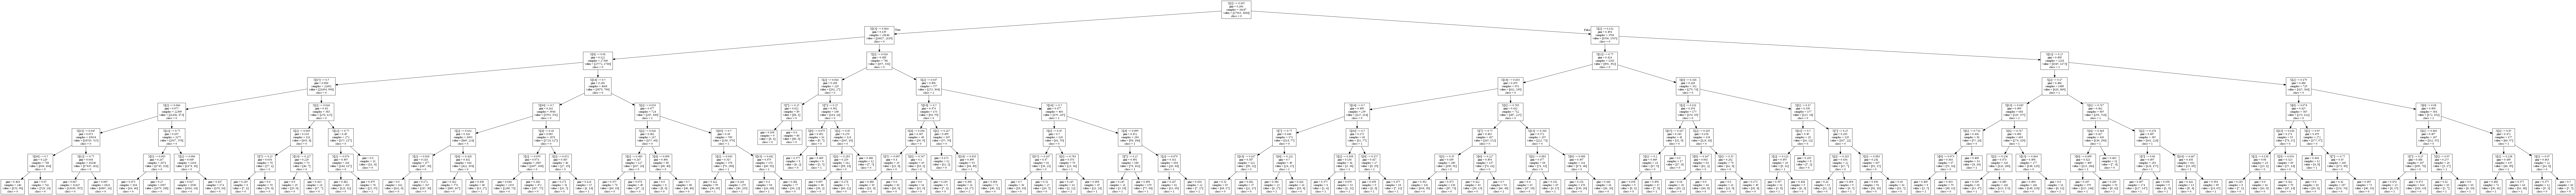

In [156]:
system("dot -Tpng DT_tree.dot -o DT_tree.png")
Image("DT_tree.png")

In [157]:
from sklearn.naive_bayes     import GaussianNB          # Using the Naive Bayes
from sklearn.neighbors import KNeighborsClassifier 

In [158]:
GNB = GaussianNB()
GNB.fit(X_Train, Y_Train)
GNB_Predict = GNB.predict(X_Test)
print(GNB.score(X_Test , Y_Test))
print(GNB.score(X_Train,Y_Train))
print(confusion_matrix(Y_Test,GNB_Predict))

0.8362456683624567
0.8419123455619806
[[10599  1359]
 [  862   743]]


In [159]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)
knn_predict = knn.predict(X_Test)
print(knn.score(X_Test,Y_Test))
print(knn.score(X_Train,Y_Train))
print(confusion_matrix(Y_Test,knn_predict))

0.8872668288726683
0.8916484974879135
[[11866    92]
 [ 1437   168]]


In [160]:
#### Bagging

In [161]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators = 50, max_samples = 0.8, oob_score = True, random_state = 1)
bc= bc.fit(X,Y)
print(bc.oob_score_)

0.903140898031409


In [162]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
x_train, x_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)
gbcl.fit(x_train, y_train)
gbcl_predict = gbcl.predict(x_test)
print(gbcl.score(x_test,Y_Test))
print(gbcl.score(x_train,y_train))
print(confusion_matrix(y_test,gbcl_predict))

0.8316006783160068
0.9051380901219743
[[11647   295]
 [ 1055   566]]


In [163]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl.fit(x_train, y_train)
rfcl_predict = rfcl.predict(x_test)
print(rfcl.score(x_test,y_test))
print(rfcl.score(x_train,y_train))
print(confusion_matrix(y_test,rfcl_predict))

0.9017179090171791
0.9998420021487707
[[11557   385]
 [  948   673]]
